# Simulation Environment

In [1]:
from simulation_package.helper.Simulation_class import Simulation
from simulation_package.helper.initialization import initialize
from simulation_package.helper.simulation_wrapper import sim_wrapper
from simulation_package.parameter_loader import load_parameters
from simulation_package.helper.fake_ray_agents import fake_agent
from simulation_package.metrics import Metrics

## Simulation parameters

In [2]:
def main(algorithm, road_network, write_phase_to_json, load_capacities, ext_dict, retrieve_ADMM_objective, global_objective):
    
    if algorithm != "Centralized":
        import ray
    
    # load simulation parameters
    params = load_parameters(algorithm, road_network, ext_dict)

    # instantiate the sim object
    sim = Simulation(params, algorithm, write_phase_to_json)

    # read (write) the necessary from (to) the roadnet file
    initialize(sim, load_capacities)
    
    if algorithm != "Centralized":
        # do some fake computations to warmup ray (consistent computation time)
        fake_agent(sim)

    # do many rounds of the same simulation
    for current_round in range(sim.params["number_of_rounds"]):

        # instantiate the Metrics class
        metrics_recorder = Metrics(sim)

        # start the simulation
        sim_wrapper(sim, metrics_recorder, retrieve_ADMM_objective, global_objective)

        # generate the performance report
        metrics_recorder.generate_report(sim, current_round)
        
        # reset variables for the next round
        if current_round < sim.params["number_of_rounds"] - 1:
            sim.reset_variables(current_round)
    

    if algorithm != "Centralized":
        # terminate ray runtime
        ray.shutdown()

    print("\n\n##### SIMULATION COMPLETED #####")

In [3]:
import numpy as np
from itertools import product
import json

delta_and_idle = [(20, 0)]
# small between 12 - 15 cars per lane
#capacity = [13, 25]
#V1 = [0, 1, 3]
#V2 = [0, 1, 3]
#V3 = [0, 1, 3]
#L = [5, 20]
#rho = [0.5, 2]


# used algorithm
# Fixed-Time, MP, CA_MP, Centralized, LDPP + T/GF + ADMM/Greedy
algorithm = "LDPP-T-ADMM"

# Specify which road network to use (dir name)
road_network = "3_4_Fine"

# write phase definitions back to roadnet file
write_phase_to_json = True if road_network != "Manhattan" else False

# use custom .json file with capacities
load_capacities = False if road_network != "Manhattan" else True

# Generate all possible combinations of parameter values
parameter_combinations = product(delta_and_idle)#, capacity, V1, V2, V3, L, rho)


retrieve_ADMM_objective = {40: None, 60: None, 100: None, 200: None, 500: None, 1000: None, 1500: None, 2000: None}
global_objective = {}


for i, combination in enumerate(parameter_combinations):
        
    ext_dict = {
        "delta": combination[0][0],
        "idle_time": combination[0][1],
        #"capacity": combination[1],
        #"V1": combination[2],
        #"V2": combination[3],
        #"V3": combination[4],
        #"L": combination[5],
        #"rho": combination[6]
    }
    
    print(ext_dict)
    main(algorithm, road_network, write_phase_to_json, load_capacities, ext_dict, retrieve_ADMM_objective, global_objective)

    if "LDPP" in algorithm:
        # Save the dictionary to a JSON file
        combined_dict = {"retrieve_ADMM_objective": retrieve_ADMM_objective, "global_objective": global_objective}

        # Save to a JSON file
        with open(f'OBJECTIVE_{algorithm.split("-")[1]}_{algorithm.split("-")[2]}_{i}.json', 'w') as json_file:
            json.dump(combined_dict, json_file, indent=2)

{'delta': 20, 'idle_time': 0}


2024-03-14 10:26:36,580	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


This cluster consists of
                1 nodes in total
                8.0 CPU resources in total
            


Simulation Time Step:   0%|          | 0/1600 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]

ADDM Iteration Step:   0%|          | 0/30 [00:00<?, ?it/s]



##### SIMULATION COMPLETED #####


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


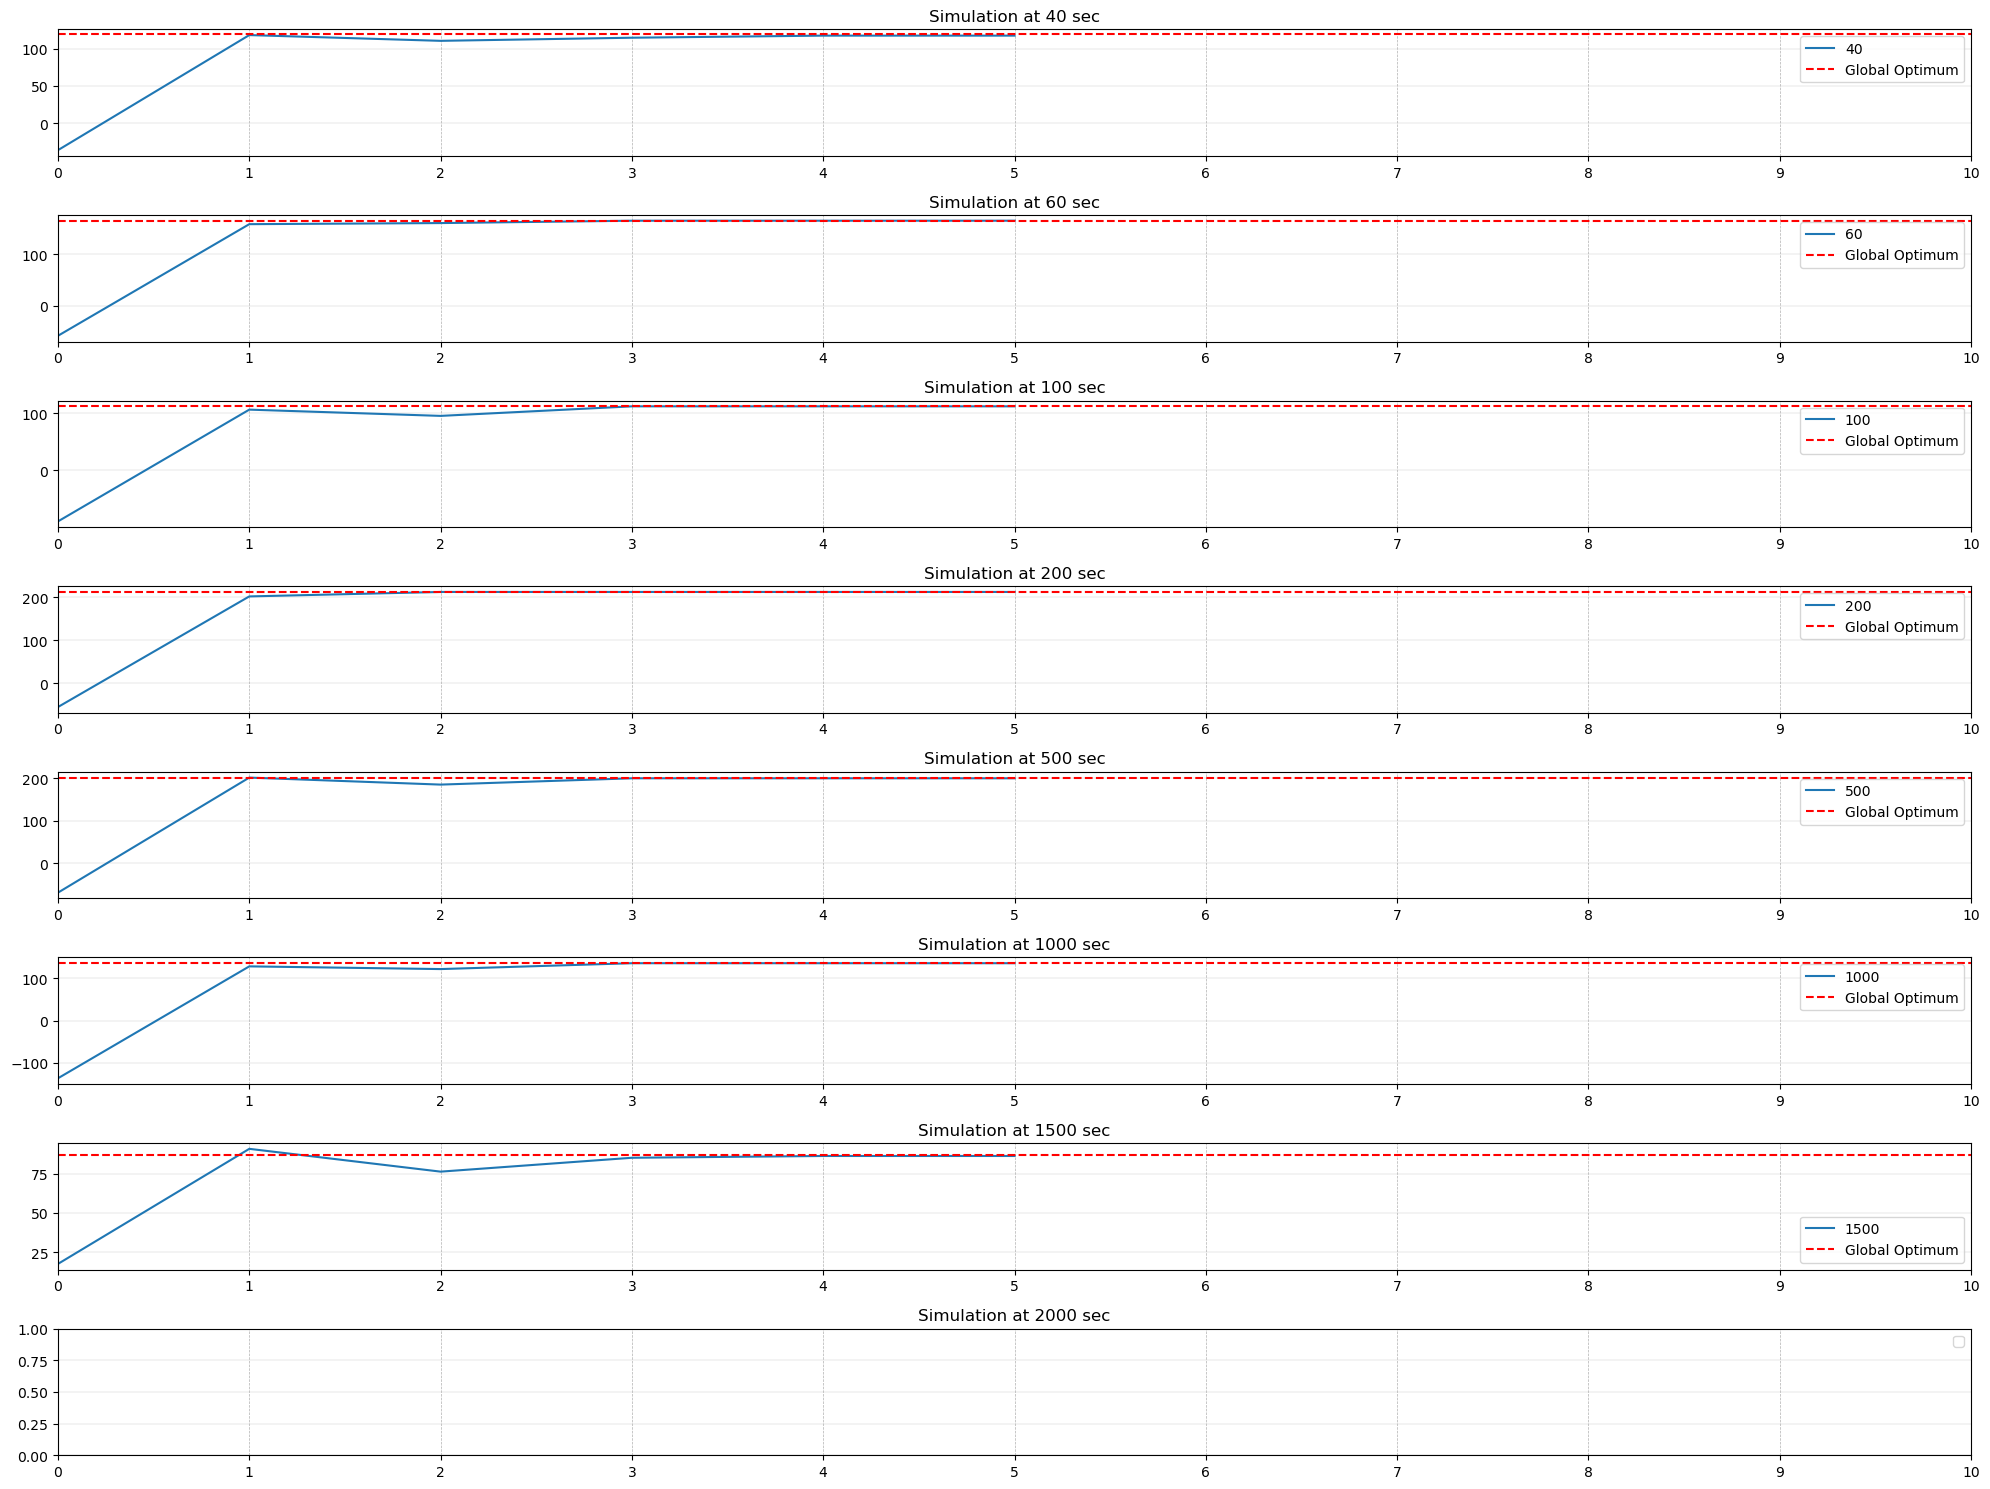

In [8]:
#import json
#import numpy as np
#import matplotlib.pyplot as plt
#
#plt.rcParams['axes.grid'] = True
#plt.rcParams['grid.linewidth'] = 0.2
#
#with open("OBJECTIVE_T_ADMM_0.json", 'r') as f:
#    OBJECTIVE = json.load(f)
#
#consensus_values = OBJECTIVE["retrieve_ADMM_objective"]
#global_optimum = OBJECTIVE["global_objective"]
#    
#titles = [f"Simulation at {i} sec" for i in consensus_values.keys()]
#
#fig, axs = plt.subplots(len(consensus_values), 1, figsize=(20, 15))
#
#for i, key in enumerate(consensus_values):
#    if consensus_values[key] is not None:
#
#        # Find the maximum length of the lists
#        max_length = max(len(lst) for lst in consensus_values[key].values())
#        
#        # Create a 2D array using broadcasting
#        values = np.array([lst + [lst[-1]] * (max_length - len(lst)) for lst in consensus_values[key].values()])
#
#        sum_ = values.sum(axis=0)
#
#        if len(sum_) == 1:
#            axs[i].axhline(y=sum_, label='key')
#        else:
#            axs[i].plot(sum_, label = key)
#            
#        axs[i].axhline(y=global_optimum[key], color='red', linestyle='--', label='Global Optimum')
#
## Set x-axis ticks to integers and show every integer for all subplots
#for i, ax in enumerate(axs):
#    
#    ax.set_title(titles[i])
#    ax.set_xlim((0,10))
#    ax.set_xticks(range(len(sum_)))
#    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#
#    # Add horizontal grid lines at every integer position
#    ax.grid(axis='x', linestyle='--', linewidth=0.5)
#
#    # Make every 5th x-axis grid line thicker (major grid)
#    ax.xaxis.grid(True, linewidth=0.5, which='major')
#    
#    # Legend
#    ax.legend()
#
#plt.tight_layout()
#plt.show()
#